In [5]:
import requests
import urllib3

In [9]:
auth_url = "https://www.strava.com/oauth/token"
payload = {
    'client_id': '92992',
    'client_secret': 'e2053017c528bc1fcf61a4a49bb3fbf58a1d5481',
    'refresh_token': 'dd2bdb77055d3ada291c9c88b1e3e0a7e8d193d3',
    'grant_type': 'refresh_token',
    'f': 'json'
}

print('Requesting Token...\n')
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print(access_token)

Requesting Token...

11e8a1d7fc30bc0d98e9662d6363d18c70c15f26


/Users/sianculley/miniforge3/envs/strava/lib/python3.8/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.strava.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [19]:
activities_url = "https://www.strava.com/api/v3/athlete/activities"

header = {'Authorization': 'Bearer '+ access_token}
param = {'per_page':200, 'page':1}
my_dataset = requests.get(activities_url, headers=header, params=param).json()

In [25]:
runs = []
for data in my_dataset:
    if data['type']=='Run':
        runs.append(data)

In [71]:
polyline_croy = my_dataset[0]['map']['summary_polyline']
polyline_tower = my_dataset[1]['map']['summary_polyline']
polyline_wand = my_dataset[2]['map']['summary_polyline']
polyline_ktw = my_dataset[3]['map']['summary_polyline']
polyline_gallion = my_dataset[4]['map']['summary_polyline']

In [66]:
import polyline

In [72]:
coords_croy = polyline.decode(polyline_croy)
coords_tower = polyline.decode(polyline_tower)
coords_wand = polyline.decode(polyline_wand)
coords_ktw = polyline.decode(polyline_ktw)
coords_gallion = polyline.decode(polyline_gallion)

In [50]:
import matplotlib.pyplot as plt

In [73]:
long_croy = [i[0] for i in coords_croy]
lat_croy = [i[1] for i in coords_croy]
long_tower = [i[0] for i in coords_tower]
lat_tower = [i[1] for i in coords_tower]
long_wand = [i[0] for i in coords_wand]
lat_wand = [i[1] for i in coords_wand]
long_ktw = [i[0] for i in coords_ktw]
lat_ktw = [i[1] for i in coords_ktw]
long_gallion = [i[0] for i in coords_gallion]
lat_gallion = [i[1] for i in coords_gallion]

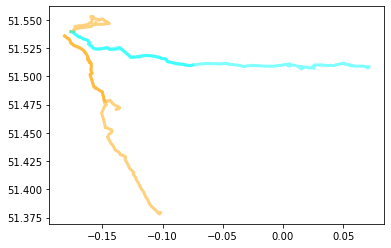

In [80]:
plt.plot(lat_croy, long_croy, color='orange', lw=3, alpha=0.5)
plt.plot(lat_tower, long_tower, color='cyan', lw=3, alpha=0.5)
plt.plot(lat_wand, long_wand, color='orange', lw=3, alpha=0.5)
plt.plot(lat_ktw, long_ktw, color='orange', lw=3, alpha=0.5)
plt.plot(lat_gallion, long_gallion, color='cyan', lw=3, alpha=0.5)

In [85]:
coords_croy[0]

(51.53571, -0.18145)

In [86]:
def get_ll(index):
    pl = my_dataset[index]['map']['summary_polyline']
    coords = polyline.decode(pl)
    long = [51.539519]
    lat = [-0.182089]
    for i in coords:
        long.append(i[0])
        lat.append(i[1])
    return lat, long

In [120]:
for i in range(9,200):
    if my_dataset[i]['type']!='Run':
        continue
    print(i, my_dataset[i]['name'])

9 BAKER STREET. DONE.
10 elm park (last of the long ones. only one station left!! fuck!!!)
11 west ken to work
12 west kensington (only 2 to go!!)
13 woodford (central line done! zone 4 done! only 3 left to go!!)
14 heathrow terminal 5 (what better way to spend a day off work? piccadilly line done!)
15 epping (was this run a good idea two days after getting hit by a car? absolutely not)
22 chalfont & latimer (awful end of the metropolitan line COMPLETED. i am so glad i never have to run out there again 💕)
33 upminster bridge (too hot, too far, too upminster)
34 hainault (hainault, hainault, don't dreeeeam it's overrrr)
39 north greenwich (apparently pain-free, fingers crossed)
44 swiss cottage (testing out increasingly injured leg on way to cricket)
61 heathrow terminal 4 (hottest day of year so far 🤝 running to heathrow 🤝 sore shin 🤝 not incredible ideas)
71 northwood (crowbarred into parent-caring schedule. gained inexplicable and incredibly painful shin injury. shinjury.)
75 Afterno

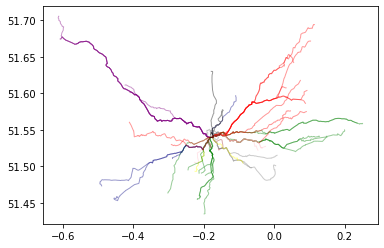

In [151]:
alpha = 0.4
lw = 1
plt.plot(get_ll(9)[0], get_ll(9)[1], color='brown', lw=lw, alpha=alpha)
plt.plot(get_ll(10)[0], get_ll(10)[1], color='green', lw=lw, alpha=alpha)
plt.plot(get_ll(12)[0], get_ll(12)[1], color='green', lw=lw, alpha=alpha)
plt.plot(get_ll(13)[0], get_ll(13)[1], color='red', lw=lw, alpha=alpha)
plt.plot(get_ll(14)[0], get_ll(14)[1], color='navy', lw=lw, alpha=alpha)
plt.plot(get_ll(15)[0], get_ll(15)[1], color='red', lw=lw, alpha=alpha)
plt.plot(get_ll(22)[0], get_ll(22)[1], color='purple', lw=lw, alpha=alpha)
plt.plot(get_ll(33)[0], get_ll(33)[1], color='green', lw=lw, alpha=alpha)
plt.plot(get_ll(34)[0], get_ll(34)[1], color='red', lw=lw, alpha=alpha)
plt.plot(get_ll(39)[0], get_ll(39)[1], color='gray', lw=lw, alpha=alpha)
plt.plot(get_ll(44)[0], get_ll(44)[1], color='gray', lw=lw, alpha=alpha)
plt.plot(get_ll(61)[0], get_ll(61)[1], color='navy', lw=lw, alpha=alpha)
plt.plot(get_ll(71)[0], get_ll(71)[1], color='purple', lw=lw, alpha=alpha)
plt.plot(get_ll(76)[0], get_ll(76)[1], color='navy', lw=lw, alpha=alpha)
plt.plot(get_ll(77)[0], get_ll(77)[1], color='green', lw=lw, alpha=alpha)
plt.plot(get_ll(79)[0], get_ll(79)[1], color='grey', lw=lw, alpha=alpha)
plt.plot(get_ll(89)[0], get_ll(89)[1], color='green', lw=lw, alpha=alpha)
plt.plot(get_ll(93)[0], get_ll(93)[1], color='pink', lw=lw, alpha=alpha)
plt.plot(get_ll(94)[0], get_ll(94)[1], color='red', lw=lw, alpha=alpha)
plt.plot(get_ll(95)[0], get_ll(95)[1], color='green', lw=lw, alpha=alpha)
plt.plot(get_ll(99)[0], get_ll(99)[1], color='green', lw=lw, alpha=alpha)
plt.plot(get_ll(100)[0], get_ll(100)[1], color='red', lw=lw, alpha=alpha)
plt.plot(get_ll(103)[0], get_ll(103)[1], color='grey', lw=lw, alpha=alpha)
plt.plot(get_ll(111)[0], get_ll(111)[1], color='grey', lw=lw, alpha=alpha)
plt.plot(get_ll(112)[0], get_ll(112)[1], color='grey', lw=lw, alpha=alpha)
plt.plot(get_ll(113)[0], get_ll(113)[1], color='purple', lw=lw, alpha=alpha)
plt.plot(get_ll(114)[0], get_ll(114)[1], color='yellow', lw=lw, alpha=alpha)
plt.plot(get_ll(119)[0], get_ll(119)[1], color='green', lw=lw, alpha=alpha)
plt.plot(get_ll(120)[0], get_ll(120)[1], color='green', lw=lw, alpha=alpha)
plt.plot(get_ll(121)[0], get_ll(121)[1], color='red', lw=lw, alpha=alpha)
plt.plot(get_ll(122)[0], get_ll(122)[1], color='pink', lw=lw, alpha=alpha)
plt.plot(get_ll(128)[0], get_ll(128)[1], color='green', lw=lw, alpha=alpha)
plt.plot(get_ll(129)[0], get_ll(129)[1], color='red', lw=lw, alpha=alpha)
plt.plot(get_ll(132)[0], get_ll(132)[1], color='pink', lw=lw, alpha=alpha)
plt.plot(get_ll(138)[0], get_ll(138)[1], color='purple', lw=lw, alpha=alpha)
plt.plot(get_ll(139)[0], get_ll(139)[1], color='green', lw=lw, alpha=alpha)
plt.plot(get_ll(149)[0], get_ll(149)[1], color='yellow', lw=lw, alpha=alpha)
plt.plot(get_ll(150)[0], get_ll(150)[1], color='pink', lw=lw, alpha=alpha)
plt.plot(get_ll(156)[0], get_ll(156)[1], color='brown', lw=lw, alpha=alpha)
plt.plot(get_ll(157)[0], get_ll(157)[1], color='purple', lw=lw, alpha=alpha)
plt.plot(get_ll(158)[0], get_ll(158)[1], color='navy', lw=lw, alpha=alpha)
plt.plot(get_ll(157)[0], get_ll(157)[1], color='purple', lw=lw, alpha=alpha)
plt.plot(get_ll(166)[0], get_ll(166)[1], color='black', lw=lw, alpha=alpha)
plt.plot(get_ll(167)[0], get_ll(167)[1], color='green', lw=lw, alpha=alpha)
plt.plot(get_ll(168)[0], get_ll(168)[1], color='red', lw=lw, alpha=alpha)
plt.plot(get_ll(178)[0], get_ll(178)[1], color='red', lw=lw, alpha=alpha)
plt.plot(get_ll(185)[0], get_ll(185)[1], color='red', lw=lw, alpha=alpha)
plt.plot(get_ll(186)[0], get_ll(186)[1], color='black', lw=lw, alpha=alpha)
plt.plot(get_ll(191)[0], get_ll(191)[1], color='green', lw=lw, alpha=alpha)
plt.plot(get_ll(194)[0], get_ll(194)[1], color='red', lw=lw, alpha=alpha)
plt.plot(get_ll(195)[0], get_ll(195)[1], color='black', lw=lw, alpha=alpha)

